### Plotting relative AAs and PTMs *just* PeaksDB results using python for _T. weissflogii_ rot experiment

Starting with:

    PeaksDB de novo-assisted results from PTM-optimized database searches
        These are diatom only

Goal:

    Figures comparing the modifcation type and extent in database 
   
    
Using:

    - pandas
    - matplotlib
    - numpy

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

### NAAF-corrected residue modification and AA composition across sample set of PeaksDB peptides

In [2]:
# for each of the 8 rot LCMS samples:
# read in NAAF totals that just PeaksDB (see NAAF-combination nb)


db_322 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-322.csv")
db_323 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-323.csv")
db_324 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-324.csv")
db_325 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-325.csv")


frames = [db_322, db_323, db_324, db_325]
index = ['1. T0', '2. T2', '3. T5', '4. T12']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['T0', 'T2', 'T5', 'T12']
tot.insert(loc=0, column='sample', value=names)
tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
db_AA = tot[['sample', 'A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'I-NAAF', 'K-NAAF', \
              'L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', \
              'W-NAAF', 'Y-NAAF']].copy()

db_ptm = tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Lys. w/ oxid.', 'Pro. w/ oxid.', \
               'Arg. w/ oxid.', 'Tyr. w/ oxid.', 'Asn. w/ deam.', 'Lys. w/ meth.', \
               'Arg. w/ meth.', 'Glu. w/ pyro.', 'Lys. w/ acet.']].copy()

# I think the 'overall modfied' is too biased by terminal residues to be meaningful
#db_ptm = tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Gln. w/ deam.', 'Lys. w/ hydr.', \
               #'Arg. w/ meth.', 'Overall modified']].copy()

db_ptm.head()

,sample,Cys. w/ carb.,Met. w/ oxid.,Lys. w/ oxid.,Pro. w/ oxid.,Arg. w/ oxid.,Tyr. w/ oxid.,Asn. w/ deam.,Lys. w/ meth.,Arg. w/ meth.,Glu. w/ pyro.,Lys. w/ acet.
0,T0,1.0,0.225848,0.000089,0.005893,0.000648,0.001996,0.001846,0.005538,0.000174,0.002328,0.000000
1,T2,1.0,0.890122,0.003028,0.054775,0.025303,0.002159,0.003015,0.003397,0.000586,0.098085,0.000000
2,T5,1.0,0.237688,0.000350,0.000814,0.000042,0.001352,0.003747,0.002527,0.000000,0.000092,0.000342
3,T12,1.0,0.192786,0.001074,0.000027,0.000000,0.001662,0.003491,0.000000,0.000000,0.000096,0.001017


In [3]:
# for each of the 4 undigested rot LCMS samples:
# read in NAAF totals that are just PeaksDB (see NAAF-combination nb)


db_329 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-329.csv")
db_330 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-330.csv")
db_331 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-331.csv")
db_332 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/data/processed/NAAF-sums/NAAF-DB-332.csv")


frames = [db_329, db_330, db_331, db_332]
index = ['T0', 'T2', 'T5', 'T12']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['T0', 'T2', 'T5', 'T12']
tot.insert(loc=0, column='sample', value=names)
tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
db_AA_undig = tot[['sample', 'A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'I-NAAF', 'K-NAAF', \
              'L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', \
              'W-NAAF', 'Y-NAAF']].copy()

db_ptm_undig = tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Lys. w/ oxid.', 'Pro. w/ oxid.', \
               'Arg. w/ oxid.', 'Tyr. w/ oxid.', 'Asn. w/ deam.', 'Lys. w/ meth.', \
               'Arg. w/ meth.', 'Glu. w/ pyro.', 'Lys. w/ acet.']].copy()

# I think the 'overall modfied' is too biased by terminal residues to be meaningful
#db_ptm = tot[['sample', 'Cys. w/ carb.', 'Met. w/ oxid.', 'Asn. w/ deam.', 'Gln. w/ deam.', 'Lys. w/ hydr.', \
               #'Arg. w/ meth.', 'Overall modified']].copy()

db_ptm_undig.head()

,sample,Cys. w/ carb.,Met. w/ oxid.,Lys. w/ oxid.,Pro. w/ oxid.,Arg. w/ oxid.,Tyr. w/ oxid.,Asn. w/ deam.,Lys. w/ meth.,Arg. w/ meth.,Glu. w/ pyro.,Lys. w/ acet.
0,T0,NaN,0.086963,0.000000,0.012373,0.006394,0.000227,0.001677,0.001426,0.000000,0.014502,0.000000
1,T2,NaN,0.483476,0.006309,0.030498,0.047883,0.004658,0.000889,0.011883,0.001193,0.140985,0.001035
2,T5,1.0,0.292509,0.000000,0.000529,0.005436,0.001053,0.001951,0.000000,0.000000,0.001541,0.000000
3,T12,NaN,0.069649,0.005949,0.000000,0.000000,0.000000,0.000000,0.005949,0.000000,0.001947,0.000000


### 1. Peptide modifications:

<Figure size 720x360 with 0 Axes>

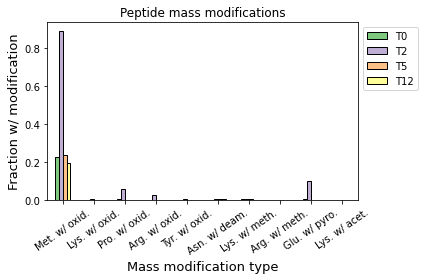

In [4]:
# plot mods across the dataset

db_ptm_s = db_ptm.drop(['sample'], axis=1)

ptm_dbT = db_ptm_s.T

ptm_dbT.columns = ['T0', 'T2', 'T5', 'T12']

four_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598']
six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

fig = plt.figure(figsize = (10, 5)) 

ax = ptm_dbT.iloc[1:11].plot(kind="bar", title = 'Peptide mass modifications', \
                             color = seven_colors, edgecolor = 'black')

plt.xticks(rotation=35)

ax.set_ylabel('Fraction w/ modification', fontsize = 13)
ax.set_xlabel('Mass modification type', fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
#legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/NAAF-digested-PTM-DB.png", dpi = 300)

#also save in latex manuscript dir
#plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/NAAF-ETNP-PTM-combined.png", dpi = 300)

<Figure size 720x360 with 0 Axes>

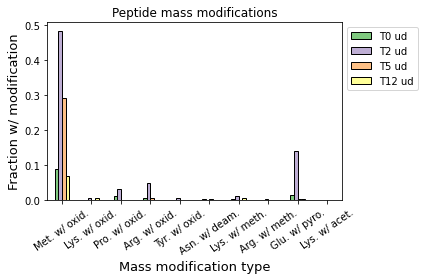

In [5]:
# plot mods across the dataset (undigested)

db_ptm_undig_s = db_ptm_undig.drop(['sample'], axis=1)

ptm_dbT_undig = db_ptm_undig_s.T

ptm_dbT_undig.columns = ['T0 ud', 'T2 ud', 'T5 ud', 'T12 ud']

four_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598']
six_colors = ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd']
six_colors_q = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
seven_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

fig = plt.figure(figsize = (10, 5)) 

ax = ptm_dbT_undig.iloc[1:11].plot(kind="bar", title = 'Peptide mass modifications', \
                             color = seven_colors, edgecolor = 'black')

plt.xticks(rotation=35)

ax.set_ylabel('Fraction w/ modification', fontsize = 13)
ax.set_xlabel('Mass modification type', fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
#legend.get_frame().set_edgecolor('1.0')

plt.tight_layout()

plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/NAAF-undigested-PTM-DB.png", dpi = 300)

#also save in latex manuscript dir
#plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/NAAF-ETNP-PTM-combined.png", dpi = 300)

In [6]:
ptm_dbT.head(11)

,T0,T2,T5,T12
Cys. w/ carb.,1.000000,1.000000,1.000000,1.000000
Met. w/ oxid.,0.225848,0.890122,0.237688,0.192786
Lys. w/ oxid.,0.000089,0.003028,0.000350,0.001074
Pro. w/ oxid.,0.005893,0.054775,0.000814,0.000027
Arg. w/ oxid.,0.000648,0.025303,0.000042,0.000000
Tyr. w/ oxid.,0.001996,0.002159,0.001352,0.001662
Asn. w/ deam.,0.001846,0.003015,0.003747,0.003491
Lys. w/ meth.,0.005538,0.003397,0.002527,0.000000
Arg. w/ meth.,0.000174,0.000586,0.000000,0.000000
Glu. w/ pyro.,0.002328,0.098085,0.000092,0.000096


In [7]:
ptm_dbT_undig.head(11)

,T0 ud,T2 ud,T5 ud,T12 ud
Cys. w/ carb.,NaN,NaN,1.000000,NaN
Met. w/ oxid.,0.086963,0.483476,0.292509,0.069649
Lys. w/ oxid.,0.000000,0.006309,0.000000,0.005949
Pro. w/ oxid.,0.012373,0.030498,0.000529,0.000000
Arg. w/ oxid.,0.006394,0.047883,0.005436,0.000000
Tyr. w/ oxid.,0.000227,0.004658,0.001053,0.000000
Asn. w/ deam.,0.001677,0.000889,0.001951,0.000000
Lys. w/ meth.,0.001426,0.011883,0.000000,0.005949
Arg. w/ meth.,0.000000,0.001193,0.000000,0.000000
Glu. w/ pyro.,0.014502,0.140985,0.001541,0.001947


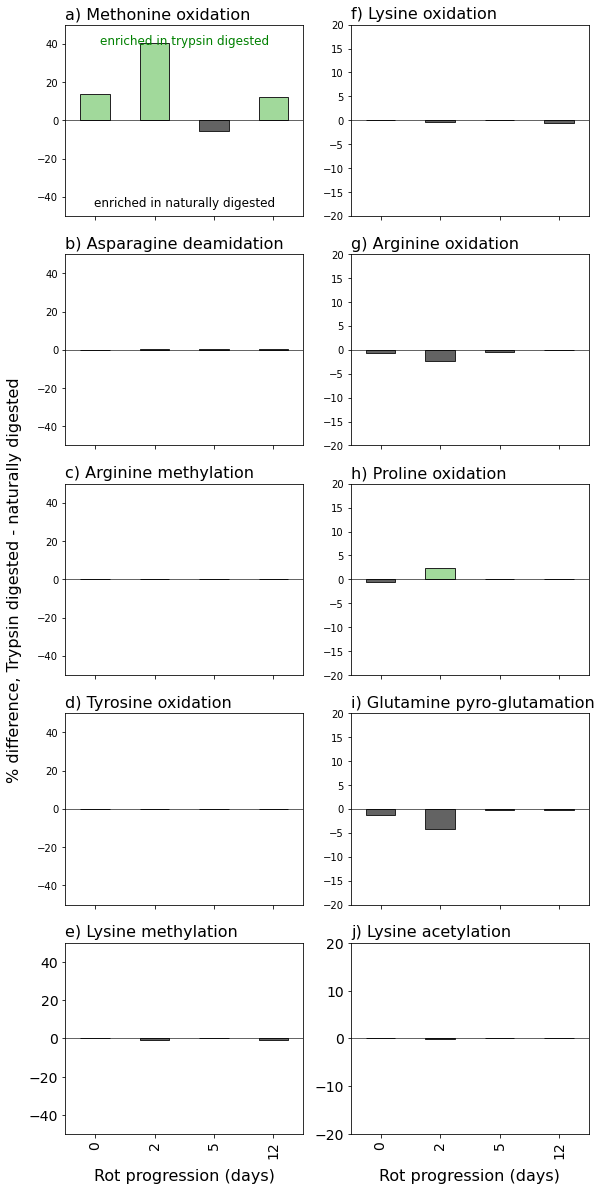

In [8]:
# add the two dataframes

diff = pd.concat([ptm_dbT, ptm_dbT_undig], axis=1)

diff['Day 0'] = (diff['T0'] - diff['T0 ud'])*100
diff['Day 2'] = (diff['T2'] - diff['T2 ud'])*100
diff['Day 5'] = (diff['T5'] - diff['T5 ud'])*100
diff['Day 12'] = (diff['T12'] - diff['T12 ud'])*100

# transpose and delete non diff columns

del diff['T0']
del diff['T2']
del diff['T5']
del diff['T12']

del diff['T0 ud']
del diff['T2 ud']
del diff['T5 ud']
del diff['T12 ud']

diff_plot = diff.T

# add column of Day #s
diff_plot['Day'] = [0, 2, 5, 12]

fig, axes = plt.subplots(figsize=(8, 16),nrows=5, ncols=2, sharex = True)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

# 

axes[0,0].annotate('enriched in trypsin digested', xy=(0.5, 0.4), 
            xytext=(0.5, 0.95), textcoords='axes fraction',
            color='green', fontsize=12,
            horizontalalignment='center', verticalalignment='top'
            )

axes[0,0].annotate('enriched in naturally digested', xy=(0.5, 0.4), 
            xytext=(0.5, 0.1), textcoords='axes fraction',
            color='black', fontsize=12,
            horizontalalignment='center', verticalalignment='top'
            )


#  Methionine oxidation
diff_plot.plot(ax = axes[0,0], x="Day", y="Met. w/ oxid.", kind='bar', stacked=False, edgecolor = '#252525', \
              color=(diff_plot['Met. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[0,0].set_title('a) Methonine oxidation', fontsize = 16, loc='left')
axes[0,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[0,0].get_legend().remove()
axes[0,0].set_ylim([-50, 50])


# Lysine oxidation
diff_plot.plot(ax = axes[0,1], x="Day", y="Lys. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Lys. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[0,1].set_title('f) Lysine oxidation', fontsize = 16, loc='left')
axes[0,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[0,1].get_legend().remove()
axes[0,1].set_ylim([-20, 20])

# Proline oxidation
diff_plot.plot(ax = axes[2,1], x="Day", y="Pro. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Pro. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[2,1].set_title('h) Proline oxidation', fontsize = 16, loc='left')
axes[2,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[2,1].get_legend().remove()
axes[2,1].set_ylim([-20, 20])

# Arginine oxidation
diff_plot.plot(ax = axes[1,1], x="Day", y="Arg. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Arg. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[1,1].set_title('g) Arginine oxidation', fontsize = 16, loc='left')
axes[1,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[1,1].get_legend().remove()
axes[1,1].set_ylim([-20, 20])

# Tyrosine oxidation
diff_plot.plot(ax = axes[3,0], x="Day", y="Tyr. w/ oxid.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Tyr. w/ oxid.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[3,0].set_title('d) Tyrosine oxidation', fontsize = 16, loc='left')
axes[3,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[3,0].get_legend().remove()
axes[3,0].set_ylim([-50, 50])

# Asparagine deamidation
diff_plot.plot(ax = axes[1,0], x="Day", y="Asn. w/ deam.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Asn. w/ deam.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[1,0].set_title('b) Asparagine deamidation', fontsize = 16, loc='left')
axes[1,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[1,0].get_legend().remove()
axes[1,0].set_ylim([-50, 50])

# Lysine methylation
diff_plot.plot(ax = axes[4,0], x="Day", y="Lys. w/ meth.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Lys. w/ meth.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[4,0].set_title('e) Lysine methylation', fontsize = 16, loc='left')
axes[4,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[4,0].get_legend().remove()
axes[4,0].set_ylim([-50, 50])
axes[4,0].set_xlabel("Rot progression (days)", fontsize = 16, labelpad = 10)
axes[4,0].tick_params(labelsize= 14)

# Arginine methylation
diff_plot.plot(ax = axes[2,0], x="Day", y="Arg. w/ meth.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Arg. w/ meth.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[2,0].set_title('c) Arginine methylation', fontsize = 16, loc='left')
axes[2,0].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[2,0].get_legend().remove()
axes[2,0].set_ylim([-50, 50])

# Label the y axes

axes[2,0].set_ylabel("% difference, Trypsin digested - naturally digested", fontsize = 16, labelpad = 15)

# Glutamine pyro-gluatmation
diff_plot.plot(ax = axes[3,1], x="Day", y="Glu. w/ pyro.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Glu. w/ pyro.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[3,1].set_title('i) Glutamine pyro-glutamation', fontsize = 16, loc='left')
axes[3,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[3,1].get_legend().remove()
axes[3,1].set_ylim([-20, 20])

# Lysine acetylation
diff_plot.plot(ax = axes[4,1], x="Day", y="Lys. w/ acet.", kind='bar', stacked=False,  edgecolor = '#252525', \
              color=(diff_plot['Lys. w/ acet.'] > 0).map({True: '#a1d99b',
                                                    False: '#636363'}))
axes[4,1].set_title('j) Lysine acetylation', fontsize = 16, loc='left')
axes[4,1].axhline(0,color='black', linewidth = 0.6) # x = 0
axes[4,1].get_legend().remove()
axes[4,1].set_ylim([-20, 20])
axes[4,1].set_xlabel("Rot progression (days)", fontsize = 16, labelpad = 10)
axes[4,1].tick_params(labelsize= 14)

## NAAF-adjusted amino acid composition 

### Just DB peptide AAs

In [11]:
# made this dataframe above
# it's just the digeseted peptides AAs
db_AA.head()

,sample,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,I-NAAF,K-NAAF,...,M-NAAF,N-NAAF,P-NAAF,Q-NAAF,R-NAAF,S-NAAF,T-NAAF,V-NAAF,W-NAAF,Y-NAAF
0,T0,733.850015,22.962069,477.439217,666.681224,183.171804,693.180906,151.145400,620.656959,170.375682,...,8.463221,766.071476,443.167452,162.533801,545.364662,556.669927,472.372483,559.024272,35.898067,65.820160
1,T2,908.198809,128.505455,787.068231,1229.543781,210.934371,915.071303,87.108981,676.119865,523.550866,...,18.919296,591.398227,710.771588,424.993684,544.987770,508.817392,738.864695,1129.465159,50.824684,106.257403
2,T5,376.130930,13.191600,539.033398,577.390814,243.405679,557.256446,126.870579,515.555154,195.228236,...,4.422767,354.811156,213.329997,140.729450,312.009247,139.769362,297.983666,304.873091,29.352401,105.142440
3,T12,233.925180,6.474450,272.965901,336.869675,113.748266,365.266197,65.243470,271.810998,94.079027,...,2.057820,301.534974,113.957413,80.161229,215.095133,76.671171,125.042275,215.194561,21.809670,44.858287


In [13]:
# db all the AAs in each dataset, making a new column

db_AA['AA-Total-NAAF'] = db_AA['A-NAAF'] + db_AA['C-NAAF'] + db_AA['D-NAAF'] + db_AA['E-NAAF'] \
+ db_AA['F-NAAF'] + db_AA['G-NAAF'] + db_AA['H-NAAF'] + db_AA['K-NAAF'] + db_AA['I-NAAF'] + db_AA['L-NAAF'] \
+ db_AA['M-NAAF'] + db_AA['N-NAAF'] + db_AA['P-NAAF'] + db_AA['Q-NAAF'] + db_AA['R-NAAF'] \
+ db_AA['S-NAAF'] + db_AA['T-NAAF'] + db_AA['V-NAAF'] + db_AA['W-NAAF'] + db_AA['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

db_AA['A_RelNAAF'] = db_AA['A-NAAF']/db_AA['AA-Total-NAAF']  #A
db_AA['C_RelNAAF'] = db_AA['C-NAAF']/db_AA['AA-Total-NAAF']  #C
db_AA['D_RelNAAF'] = db_AA['D-NAAF']/db_AA['AA-Total-NAAF']  #D
db_AA['E_RelNAAF'] = db_AA['E-NAAF']/db_AA['AA-Total-NAAF']  #E
db_AA['F_RelNAAF'] = db_AA['F-NAAF']/db_AA['AA-Total-NAAF']  #F
db_AA['G_RelNAAF'] = db_AA['G-NAAF']/db_AA['AA-Total-NAAF']  #G
db_AA['H_RelNAAF'] = db_AA['H-NAAF']/db_AA['AA-Total-NAAF']  #H
db_AA['K_RelNAAF'] = db_AA['K-NAAF']/db_AA['AA-Total-NAAF']  #K
db_AA['I/L_RelNAAF'] = (db_AA['I-NAAF'] + db_AA['L-NAAF'])/db_AA['AA-Total-NAAF']  #I/L
db_AA['M_RelNAAF'] = db_AA['M-NAAF']/db_AA['AA-Total-NAAF']  #M
db_AA['N_RelNAAF'] = db_AA['N-NAAF']/db_AA['AA-Total-NAAF']  #N
db_AA['P_RelNAAF'] = db_AA['P-NAAF']/db_AA['AA-Total-NAAF']  #P
db_AA['Q_RelNAAF'] = db_AA['Q-NAAF']/db_AA['AA-Total-NAAF']  #Q
db_AA['R_RelNAAF'] = db_AA['R-NAAF']/db_AA['AA-Total-NAAF']  #R
db_AA['S_RelNAAF'] = db_AA['S-NAAF']/db_AA['AA-Total-NAAF']  #S
db_AA['T_RelNAAF'] = db_AA['T-NAAF']/db_AA['AA-Total-NAAF']  #T
db_AA['V_RelNAAF'] = db_AA['V-NAAF']/db_AA['AA-Total-NAAF']  #V
db_AA['W_RelNAAF'] = db_AA['W-NAAF']/db_AA['AA-Total-NAAF']  #W
db_AA['Y_RelNAAF'] = db_AA['Y-NAAF']/db_AA['AA-Total-NAAF']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions
db_relAA = db_AA[['sample', 'A_RelNAAF', 'C_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'N_RelNAAF', 'P_RelNAAF', 'Q_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

db_relAA.to_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB-RelNAAF-AAs.csv")

db_relAA.head(6)

,sample,A_RelNAAF,C_RelNAAF,D_RelNAAF,E_RelNAAF,F_RelNAAF,G_RelNAAF,H_RelNAAF,K_RelNAAF,I/L_RelNAAF,M_RelNAAF,N_RelNAAF,P_RelNAAF,Q_RelNAAF,R_RelNAAF,S_RelNAAF,T_RelNAAF,V_RelNAAF,W_RelNAAF,Y_RelNAAF
0,T0,0.089107,0.002788,0.057972,0.080951,0.022241,0.084168,0.018353,0.020688,0.184740,0.001028,0.093019,0.053811,0.019735,0.066220,0.067593,0.057357,0.067879,0.004359,0.007992
1,T2,0.080738,0.011424,0.069969,0.109305,0.018752,0.081349,0.007744,0.046543,0.145215,0.001682,0.052574,0.063187,0.037781,0.048449,0.045233,0.065684,0.100408,0.004518,0.009446
2,T5,0.067971,0.002384,0.097410,0.104342,0.043986,0.100703,0.022927,0.035280,0.181206,0.000799,0.064119,0.038551,0.025432,0.056384,0.025258,0.053849,0.055094,0.005304,0.019001
3,T12,0.071567,0.001981,0.083512,0.103062,0.034800,0.111750,0.019961,0.028783,0.178562,0.000630,0.092252,0.034864,0.024525,0.065806,0.023457,0.038256,0.065837,0.006672,0.013724


In [14]:
# db all the AAs in each dataset EXCEPT those not included in THAA analyses, making a new column
# THAA doesn't get C, N, Q, and W

db_AA['AA-Total-NAAF-THAAinc'] = db_AA['A-NAAF'] + + db_AA['D-NAAF'] + db_AA['E-NAAF'] \
+ db_AA['F-NAAF'] + db_AA['G-NAAF'] + db_AA['H-NAAF'] + db_AA['K-NAAF'] + db_AA['I-NAAF'] + db_AA['L-NAAF'] \
+ db_AA['M-NAAF'] + db_AA['P-NAAF'] + db_AA['R-NAAF'] \
+ db_AA['S-NAAF'] + db_AA['T-NAAF'] + db_AA['V-NAAF'] + db_AA['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

db_AA['A_RelNAAF'] = db_AA['A-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #A
#db_AA['C_RelNAAF'] = db_AA['C-NAAF']/db_AA['AA-Total-NAAF']  #C
db_AA['D_RelNAAF'] = db_AA['D-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #D
db_AA['E_RelNAAF'] = db_AA['E-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #E
db_AA['F_RelNAAF'] = db_AA['F-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #F
db_AA['G_RelNAAF'] = db_AA['G-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #G
db_AA['H_RelNAAF'] = db_AA['H-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #H
db_AA['K_RelNAAF'] = db_AA['K-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #K
db_AA['I/L_RelNAAF'] = (db_AA['I-NAAF'] + db_AA['L-NAAF'])/db_AA['AA-Total-NAAF-THAAinc']  #I/L
db_AA['M_RelNAAF'] = db_AA['M-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #M
#db_AA['N_RelNAAF'] = db_AA['N-NAAF']/db_AA['AA-Total-NAAF']  #N
db_AA['P_RelNAAF'] = db_AA['P-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #P
#db_AA['Q_RelNAAF'] = db_AA['Q-NAAF']/db_AA['AA-Total-NAAF']  #Q
db_AA['R_RelNAAF'] = db_AA['R-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #R
db_AA['S_RelNAAF'] = db_AA['S-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #S
db_AA['T_RelNAAF'] = db_AA['T-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #T
db_AA['V_RelNAAF'] = db_AA['V-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #V
#db_AA['W_RelNAAF'] = db_AA['W-NAAF']/db_AA['AA-Total-NAAF']  #W
db_AA['Y_RelNAAF'] = db_AA['Y-NAAF']/db_AA['AA-Total-NAAF-THAAinc']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions (THAA compatible)
DigPep_relAA_THAAcompatible = db_AA[['sample', 'A_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'P_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

DigPep_relAA_THAAcompatible.to_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB-RelNAAF-AAs-THAAcompatible.csv")

DigPep_relAA_THAAcompatible.head(6)

,sample,A_RelNAAF,D_RelNAAF,E_RelNAAF,F_RelNAAF,G_RelNAAF,H_RelNAAF,K_RelNAAF,I/L_RelNAAF,M_RelNAAF,P_RelNAAF,R_RelNAAF,S_RelNAAF,T_RelNAAF,V_RelNAAF,Y_RelNAAF
0,T0,0.101246,0.065870,0.091979,0.025271,0.095635,0.020853,0.023506,0.209908,0.001168,0.061142,0.075242,0.076801,0.065171,0.077126,0.009081
1,T2,0.090341,0.078291,0.122306,0.020982,0.091024,0.008665,0.052079,0.162487,0.001882,0.070702,0.054211,0.050613,0.073497,0.112350,0.010570
2,T5,0.075293,0.107902,0.115580,0.048724,0.111550,0.025397,0.039080,0.200724,0.000885,0.042704,0.062457,0.027979,0.059649,0.061029,0.021047
3,T12,0.081831,0.095489,0.117843,0.039791,0.127777,0.022823,0.032911,0.204171,0.000720,0.039864,0.075244,0.026821,0.043742,0.075279,0.015692


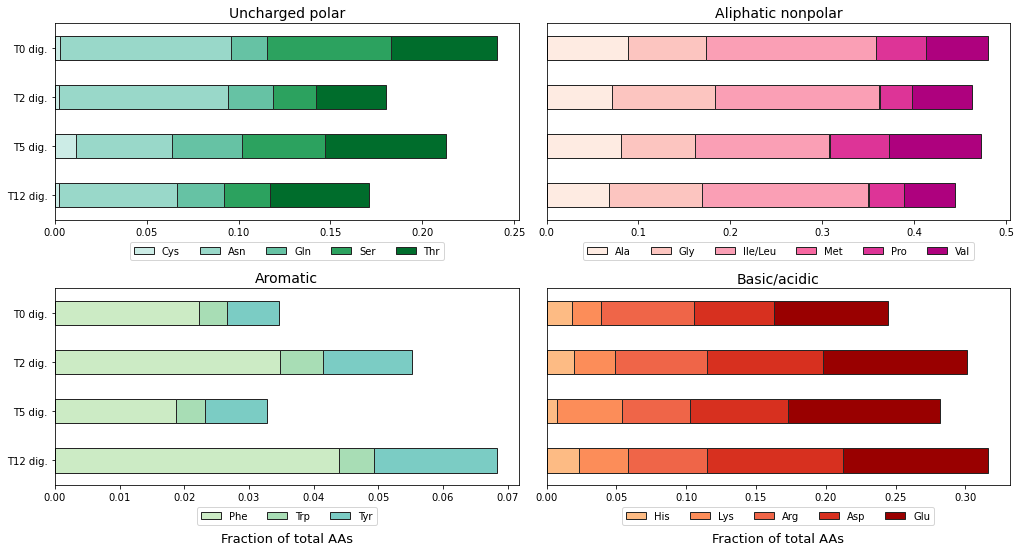

In [15]:
# plotting the NAAF-corrected AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

db_relAA_des = db_relAA.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: cysteine, asparagine, glutamine, serine, threonine
up = db_relAA_des[['sample', 'C_RelNAAF', 'N_RelNAAF', 'Q_RelNAAF', 'S_RelNAAF', 'T_RelNAAF']].copy()
up_names = ['sample', 'Cys', 'Asn', 'Gln', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = db_relAA_des[['sample', 'A_RelNAAF', 'G_RelNAAF','I/L_RelNAAF', 'M_RelNAAF',\
                    'P_RelNAAF', 'V_RelNAAF']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tryptophan, tyrosine
ar = db_relAA_des[['sample', 'F_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy() 
ar_names = ['sample', 'Phe', 'Trp', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = db_relAA_des[['sample', 'H_RelNAAF', 'K_RelNAAF', 'R_RelNAAF', 'D_RelNAAF', 'E_RelNAAF']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T12 dig.', 'T5 dig.', 'T2 dig.', 'T0 dig.') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T12 dig.', 'T5 dig.', 'T2 dig.', 'T0 dig.') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)

#fig.suptitle('Relative amino acid composition of ETNP POM peptides', y = 1.07, size = 15)

# save figure in ptm-analyses dir
plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB-AA-NAAFs.png", dpi = 300, bbox_inches='tight', transparent=True)

# also save in manuscript latex dir high res
#plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/ETNP-AAs.png", dpi = 300, bbox_inches='tight')

## Now for the undigested AAs

In [16]:
# made this dataframe above
# it's just the undigeseted peptides AAs
db_AA_undig.head()

,sample,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,I-NAAF,K-NAAF,...,M-NAAF,N-NAAF,P-NAAF,Q-NAAF,R-NAAF,S-NAAF,T-NAAF,V-NAAF,W-NAAF,Y-NAAF
0,T0,154.716472,0.000000,309.460845,188.451470,76.992082,398.145433,96.195838,237.602283,62.717156,...,3.393430,99.232673,244.054244,97.816627,73.793827,67.546073,106.971702,166.724136,1.636538,40.539761
1,T2,1343.073770,0.000000,1872.380644,2886.464249,792.960391,2129.644478,400.210267,1034.571071,1092.041198,...,258.110404,917.153623,1618.143048,830.345736,715.134365,696.082700,1049.419342,1532.395237,26.159007,172.275364
2,T5,85.254523,0.006299,418.088294,165.118479,71.621912,275.375368,107.876616,268.182024,61.329375,...,9.788334,54.683096,266.711043,47.900919,50.889484,47.079644,69.276272,106.147837,6.364837,97.871308
3,T12,8.058982,0.000000,76.042215,16.685600,3.624799,85.589143,44.473753,89.789919,5.085563,...,8.506291,9.131574,80.706149,6.291238,2.765563,2.464672,1.574958,20.922135,1.016880,36.059969


In [17]:
# db all the AAs in each dataset, making a new column

db_AA_undig['AA-Total-NAAF'] = db_AA_undig['A-NAAF'] + db_AA_undig['C-NAAF'] + db_AA_undig['D-NAAF'] + db_AA_undig['E-NAAF'] \
+ db_AA_undig['F-NAAF'] + db_AA_undig['G-NAAF'] + db_AA_undig['H-NAAF'] + db_AA_undig['K-NAAF'] + db_AA_undig['I-NAAF'] + db_AA_undig['L-NAAF'] \
+ db_AA_undig['M-NAAF'] + db_AA_undig['N-NAAF'] + db_AA_undig['P-NAAF'] + db_AA_undig['Q-NAAF'] + db_AA_undig['R-NAAF'] \
+ db_AA_undig['S-NAAF'] + db_AA_undig['T-NAAF'] + db_AA_undig['V-NAAF'] + db_AA_undig['W-NAAF'] + db_AA_undig['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

db_AA_undig['A_RelNAAF'] = db_AA_undig['A-NAAF']/db_AA_undig['AA-Total-NAAF']  #A
db_AA_undig['C_RelNAAF'] = db_AA_undig['C-NAAF']/db_AA_undig['AA-Total-NAAF']  #C
db_AA_undig['D_RelNAAF'] = db_AA_undig['D-NAAF']/db_AA_undig['AA-Total-NAAF']  #D
db_AA_undig['E_RelNAAF'] = db_AA_undig['E-NAAF']/db_AA_undig['AA-Total-NAAF']  #E
db_AA_undig['F_RelNAAF'] = db_AA_undig['F-NAAF']/db_AA_undig['AA-Total-NAAF']  #F
db_AA_undig['G_RelNAAF'] = db_AA_undig['G-NAAF']/db_AA_undig['AA-Total-NAAF']  #G
db_AA_undig['H_RelNAAF'] = db_AA_undig['H-NAAF']/db_AA_undig['AA-Total-NAAF']  #H
db_AA_undig['K_RelNAAF'] = db_AA_undig['K-NAAF']/db_AA_undig['AA-Total-NAAF']  #K
db_AA_undig['I/L_RelNAAF'] = (db_AA_undig['I-NAAF'] + db_AA_undig['L-NAAF'])/db_AA_undig['AA-Total-NAAF']  #I/L
db_AA_undig['M_RelNAAF'] = db_AA_undig['M-NAAF']/db_AA_undig['AA-Total-NAAF']  #M
db_AA_undig['N_RelNAAF'] = db_AA_undig['N-NAAF']/db_AA_undig['AA-Total-NAAF']  #N
db_AA_undig['P_RelNAAF'] = db_AA_undig['P-NAAF']/db_AA_undig['AA-Total-NAAF']  #P
db_AA_undig['Q_RelNAAF'] = db_AA_undig['Q-NAAF']/db_AA_undig['AA-Total-NAAF']  #Q
db_AA_undig['R_RelNAAF'] = db_AA_undig['R-NAAF']/db_AA_undig['AA-Total-NAAF']  #R
db_AA_undig['S_RelNAAF'] = db_AA_undig['S-NAAF']/db_AA_undig['AA-Total-NAAF']  #S
db_AA_undig['T_RelNAAF'] = db_AA_undig['T-NAAF']/db_AA_undig['AA-Total-NAAF']  #T
db_AA_undig['V_RelNAAF'] = db_AA_undig['V-NAAF']/db_AA_undig['AA-Total-NAAF']  #V
db_AA_undig['W_RelNAAF'] = db_AA_undig['W-NAAF']/db_AA_undig['AA-Total-NAAF']  #W
db_AA_undig['Y_RelNAAF'] = db_AA_undig['Y-NAAF']/db_AA_undig['AA-Total-NAAF']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions
db_relAA_undig = db_AA_undig[['sample', 'A_RelNAAF', 'C_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'N_RelNAAF', 'P_RelNAAF', 'Q_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

db_relAA_undig.to_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/undigested-DB-RelNAAF-AAs.csv")

db_relAA_undig.head(6)

,sample,A_RelNAAF,C_RelNAAF,D_RelNAAF,E_RelNAAF,F_RelNAAF,G_RelNAAF,H_RelNAAF,K_RelNAAF,I/L_RelNAAF,M_RelNAAF,N_RelNAAF,P_RelNAAF,Q_RelNAAF,R_RelNAAF,S_RelNAAF,T_RelNAAF,V_RelNAAF,W_RelNAAF,Y_RelNAAF
0,T0,0.060436,0.000000,0.120883,0.073614,0.030075,0.155526,0.037576,0.024499,0.145161,0.001326,0.038763,0.095334,0.038210,0.028826,0.026385,0.041786,0.065127,0.000639,0.015836
1,T2,0.062243,0.000000,0.086773,0.133769,0.036749,0.098696,0.018547,0.050609,0.150428,0.011962,0.042504,0.074991,0.038481,0.033142,0.032259,0.048634,0.071017,0.001212,0.007984
2,T5,0.035957,0.000003,0.176334,0.069641,0.030207,0.116143,0.045498,0.025866,0.181196,0.004128,0.023063,0.112489,0.020203,0.021463,0.019856,0.029218,0.044769,0.002684,0.041279
3,T12,0.014624,0.000000,0.137992,0.030279,0.006578,0.155317,0.080706,0.009229,0.257796,0.015436,0.016571,0.146456,0.011417,0.005019,0.004473,0.002858,0.037967,0.001845,0.065437


In [18]:
# db all the AAs in each dataset EXCEPT those not included in THAA analyses, making a new column
# THAA doesn't get C, N, Q, and W

db_AA_undig['AA-Total-NAAF-THAAinc'] = db_AA_undig['A-NAAF'] + + db_AA_undig['D-NAAF'] + db_AA_undig['E-NAAF'] \
+ db_AA_undig['F-NAAF'] + db_AA_undig['G-NAAF'] + db_AA_undig['H-NAAF'] + db_AA_undig['K-NAAF'] + db_AA_undig['I-NAAF'] + db_AA_undig['L-NAAF'] \
+ db_AA_undig['M-NAAF'] + db_AA_undig['P-NAAF'] + db_AA_undig['R-NAAF'] \
+ db_AA_undig['S-NAAF'] + db_AA_undig['T-NAAF'] + db_AA_undig['V-NAAF'] + db_AA_undig['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

db_AA_undig['A_RelNAAF'] = db_AA_undig['A-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #A
#db_AA_undig['C_RelNAAF'] = db_AA_undig['C-NAAF']/db_AA_undig['AA-Total-NAAF']  #C
db_AA_undig['D_RelNAAF'] = db_AA_undig['D-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #D
db_AA_undig['E_RelNAAF'] = db_AA_undig['E-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #E
db_AA_undig['F_RelNAAF'] = db_AA_undig['F-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #F
db_AA_undig['G_RelNAAF'] = db_AA_undig['G-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #G
db_AA_undig['H_RelNAAF'] = db_AA_undig['H-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #H
db_AA_undig['K_RelNAAF'] = db_AA_undig['K-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #K
db_AA_undig['I/L_RelNAAF'] = (db_AA_undig['I-NAAF'] + db_AA_undig['L-NAAF'])/db_AA_undig['AA-Total-NAAF-THAAinc']  #I/L
db_AA_undig['M_RelNAAF'] = db_AA_undig['M-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #M
#db_AA_undig['N_RelNAAF'] = db_AA_undig['N-NAAF']/db_AA_undig['AA-Total-NAAF']  #N
db_AA_undig['P_RelNAAF'] = db_AA_undig['P-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #P
#db_AA_undig['Q_RelNAAF'] = db_AA_undig['Q-NAAF']/db_AA_undig['AA-Total-NAAF']  #Q
db_AA_undig['R_RelNAAF'] = db_AA_undig['R-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #R
db_AA_undig['S_RelNAAF'] = db_AA_undig['S-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #S
db_AA_undig['T_RelNAAF'] = db_AA_undig['T-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #T
db_AA_undig['V_RelNAAF'] = db_AA_undig['V-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #V
#db_AA_undig['W_RelNAAF'] = db_AA_undig['W-NAAF']/db_AA_undig['AA-Total-NAAF']  #W
db_AA_undig['Y_RelNAAF'] = db_AA_undig['Y-NAAF']/db_AA_undig['AA-Total-NAAF-THAAinc']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions (THAA compatible)
UndigPep_relAA_THAAcompatible = db_AA_undig[['sample', 'A_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'P_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'Y_RelNAAF']].copy()

#export as a csv

UndigPep_relAA_THAAcompatible.to_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/undigested-DB-RelNAAF-AAs-THAAcompatible.csv")

UndigPep_relAA_THAAcompatible.head(6)

,sample,A_RelNAAF,D_RelNAAF,E_RelNAAF,F_RelNAAF,G_RelNAAF,H_RelNAAF,K_RelNAAF,I/L_RelNAAF,M_RelNAAF,P_RelNAAF,R_RelNAAF,S_RelNAAF,T_RelNAAF,V_RelNAAF,Y_RelNAAF
0,T0,0.065521,0.131054,0.079808,0.032606,0.168612,0.040738,0.026560,0.157375,0.001437,0.103355,0.031251,0.028605,0.045302,0.070607,0.017168
1,T2,0.067817,0.094544,0.145750,0.040040,0.107535,0.020208,0.055142,0.163901,0.013033,0.081707,0.036110,0.035148,0.052990,0.077377,0.008699
2,T5,0.037689,0.184828,0.072995,0.031662,0.121737,0.047690,0.027112,0.189924,0.004327,0.117907,0.022497,0.020813,0.030626,0.046926,0.043267
3,T12,0.015074,0.142236,0.031210,0.006780,0.160093,0.083187,0.009512,0.265723,0.015911,0.150960,0.005173,0.004610,0.002946,0.039135,0.067450


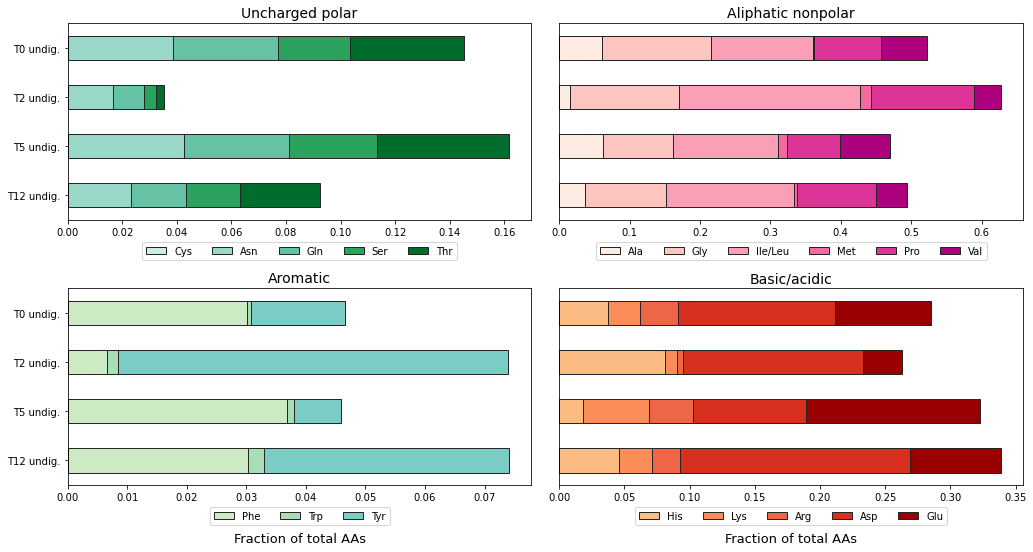

In [20]:
# plotting the NAAF-corrected AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

db_relAA_undig_des = db_relAA_undig.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: cysteine, asparagine, glutamine, serine, threonine
up = db_relAA_undig_des[['sample', 'C_RelNAAF', 'N_RelNAAF', 'Q_RelNAAF', 'S_RelNAAF', 'T_RelNAAF']].copy()
up_names = ['sample', 'Cys', 'Asn', 'Gln', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = db_relAA_undig_des[['sample', 'A_RelNAAF', 'G_RelNAAF','I/L_RelNAAF', 'M_RelNAAF',\
                    'P_RelNAAF', 'V_RelNAAF']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tryptophan, tyrosine
ar = db_relAA_undig_des[['sample', 'F_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy() 
ar_names = ['sample', 'Phe', 'Trp', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = db_relAA_undig_des[['sample', 'H_RelNAAF', 'K_RelNAAF', 'R_RelNAAF', 'D_RelNAAF', 'E_RelNAAF']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T12 undig.', 'T5 undig.', 'T2 undig.', 'T0 undig.') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T12 undig.', 'T5 undig.', 'T2 undig.', 'T0 undig.') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)

#fig.suptitle('Relative amino acid composition of ETNP POM peptides', y = 1.07, size = 15)

# save figure in ptm-analyses dir
plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/undigested-DB-AA-NAAFs.png", dpi = 300, bbox_inches='tight', transparent=True)

# also save in manuscript latex dir high res
#plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/ETNP-AAs.png", dpi = 300, bbox_inches='tight')